<a href="https://colab.research.google.com/github/teshenglin/computational_mathematics/blob/master/polynomial_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial interpolation

* Interpolation
  1. [scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)
  2. [scipy.interpolate.lagrange](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange)
  3. [scipy.interpolate.barycentric_interpolate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html#scipy.interpolate.barycentric_interpolate)
  4. [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
  5. Newton's interpolation polynomial
  6. Find coefficients by solving the Vandermonde system


### Example
To approximate $f(x)=\sin(x)$, $x\in [0,1]$ using some data points. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Interpolation using python package 1

* [scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)
  * Remark: The default setting is a linear interpolation, i.e., connecting neighboring points by a linear function.

In [ ]:
from scipy import interpolate

In [ ]:
def f(x):
    return np.sin(x)

# Data
x = np.linspace(0, 1.0, 10)
y = f(x)

# To predict at new data
xnew = np.linspace(0, 1.0, 1000)
# True solution
fynew = f(xnew)

In [ ]:
# Interpolation polynomial by scipy.interpolate.interp1d
Interpf = interpolate.interp1d(x, y)

# prediction at new data
ynew = Interpf(xnew)

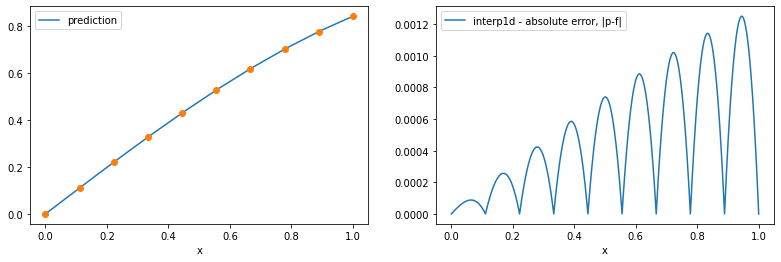

In [ ]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.3))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
plt.plot(xnew, ynew, '-', x, y, 'o')
plt.legend(['prediction'], loc='upper left')
plt.xlabel('x')

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
plt.plot(xnew, np.abs(ynew-fynew))
plt.legend(['interp1d - absolute error, |p-f|'], loc='upper left')
plt.xlabel('x')
plt.show()

## Interpolation using python package 2

* [scipy.interpolate.lagrange](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange)

In [ ]:
from scipy.interpolate import lagrange

In [ ]:
poly = lagrange(x, y)
ynew2 = poly(xnew)

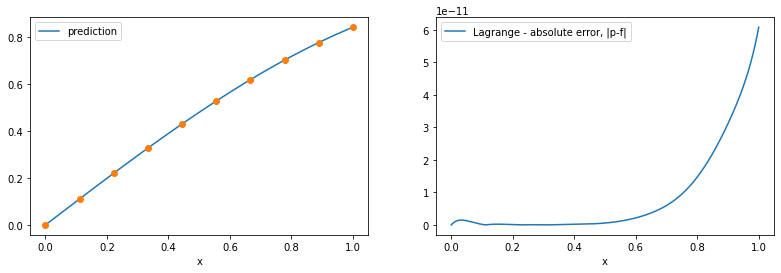

In [ ]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.3))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
plt.plot(xnew, ynew2, '-', x, y, 'o')
plt.legend(['prediction'], loc='upper left')
plt.xlabel('x')

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
plt.plot(xnew, np.abs(ynew2-fynew))
plt.legend(['Lagrange - absolute error, |p-f|'], loc='upper left')
plt.xlabel('x')
plt.show()

## Interpolation using python package 3

* [scipy.interpolate.barycentric_interpolate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html#scipy.interpolate.barycentric_interpolate)

In [ ]:
from scipy.interpolate import barycentric_interpolate

In [ ]:
ynew3 = barycentric_interpolate(x, y, xnew)

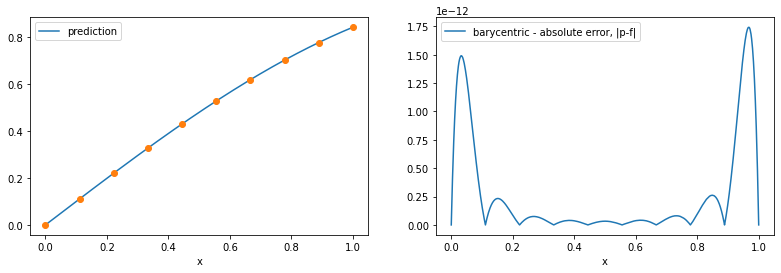

In [ ]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.3))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
plt.plot(xnew, ynew3, '-', x, y, 'o')
plt.legend(['prediction'], loc='upper left')
plt.xlabel('x')

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
plt.plot(xnew, np.abs(ynew3-fynew))
plt.legend(['barycentric - absolute error, |p-f|'], loc='upper left')
plt.xlabel('x')
plt.show()

## Interpolation using python package 4

* [numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

In [ ]:
# Interpolation polynomial by numpy.polyfit
pol = np.polyfit(x,y,len(x)-1)

# prediction at new data
ynew4 = np.polyval(pol,xnew)

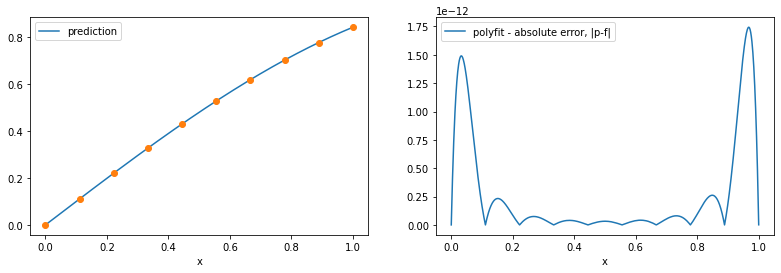

In [ ]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.3))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
plt.plot(xnew, ynew4, '-', x, y, 'o')
plt.legend(['prediction'], loc='upper left')
plt.xlabel('x')

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
plt.plot(xnew, np.abs(ynew4-fynew))
plt.legend(['polyfit - absolute error, |p-f|'], loc='upper left')
plt.xlabel('x')
plt.show()

## Newton's interpolation polynomial

* [JoosKorstanje - polynomial_interpolation_010.py](https://gist.github.com/JoosKorstanje/c768c2bc2f0501bb895b351f88f1c7f2#file-polynomial_interpolation_010-py)

In [ ]:
def poly_newton_coefficient(x, y):    
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    c = np.copy(y)
    for k in range(1, m):
        c[k:m] = (c[k:m] - c[k - 1])/(x[k:m] - x[k - 1])

    return c

def newton_polynomial(x_data, c, xx):
    """
    x_data: data points at x
    c: coefficients
    xx: evaluation point(s)
    """
    n = len(x_data) - 1  # Degree of polynomial
    p = c[n]

    for k in range(1, n + 1):
        p = c[n - k] + (xx - x_data[n - k])*p

    return p

In [ ]:
c = poly_newton_coefficient(x, y)
ynew5 = newton_polynomial(x, c, xnew)

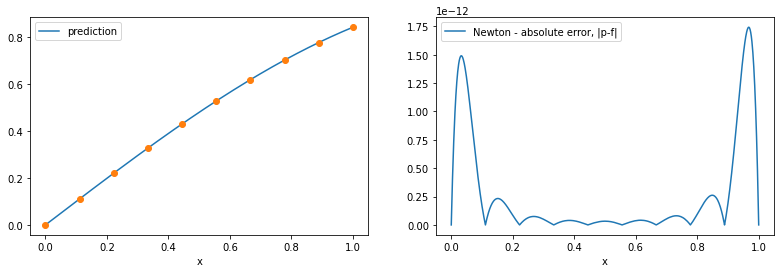

In [ ]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.3))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
plt.plot(xnew, ynew5, '-', x, y, 'o')
plt.legend(['prediction'], loc='upper left')
plt.xlabel('x')

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
plt.plot(xnew, np.abs(ynew5-fynew))
plt.legend(['Newton - absolute error, |p-f|'], loc='upper left')
plt.xlabel('x')
plt.show()

## Find coefficients by solving the Vandermonde system

In [ ]:
A = np.vander(x,increasing=True)
coefs = np.linalg.solve(A,y)
ynew6 = sum([coefs[k]*xnew**k for k in range(0,10)])

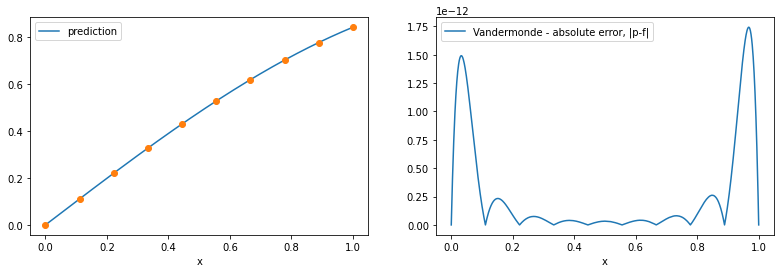

In [ ]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.3))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1)
plt.plot(xnew, ynew6, '-', x, y, 'o')
plt.legend(['prediction'], loc='upper left')
plt.xlabel('x')

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
plt.plot(xnew, np.abs(ynew6-fynew))
plt.legend(['Vandermonde - absolute error, |p-f|'], loc='upper left')
plt.xlabel('x')
plt.show()